In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/results/visualisation/exp2/20210417-005437/pose_2.csv")

In [3]:
print(data)
num = 2
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


    time  ID         x  x_idx         y  y_idx       yaw
0    0.0   0  2.022542    161  1.469463    150 -2.513275
1    0.0   1 -2.022542     80 -1.469463     91  0.628318
2    0.1   0  2.022547    161  1.469466    150 -2.513288
3    0.1   1 -2.022547     80 -1.469466     91  0.628305
4    0.2   0  2.010412    161  1.460589    150 -2.506555
5    0.2   1 -2.010412     80 -1.460589     91  0.635038
6    0.3   0  1.964727    160  1.425995    149 -2.477597
7    0.3   1 -1.964727     81 -1.425995     92  0.663994
8    0.4   0  1.891991    158  1.365848    148 -2.425063
9    0.4   1 -1.892047     83 -1.366091     93  0.711505
10   0.5   0  1.800091    157  1.280177    146 -2.356005
11   0.5   1 -1.799977     85 -1.281684     95  0.772691
12   0.6   0  1.696654    154  1.169321    144 -2.275321
13   0.6   1 -1.692799     87 -1.167988     97  0.838708
14   0.7   0  1.595380    152  1.036448    141 -2.178142
15   0.7   1 -1.582681     89 -1.033365    100  0.945588
16   0.8   0  1.501130    151  

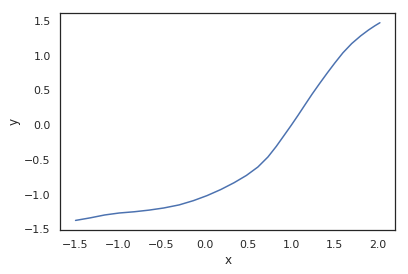

In [4]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

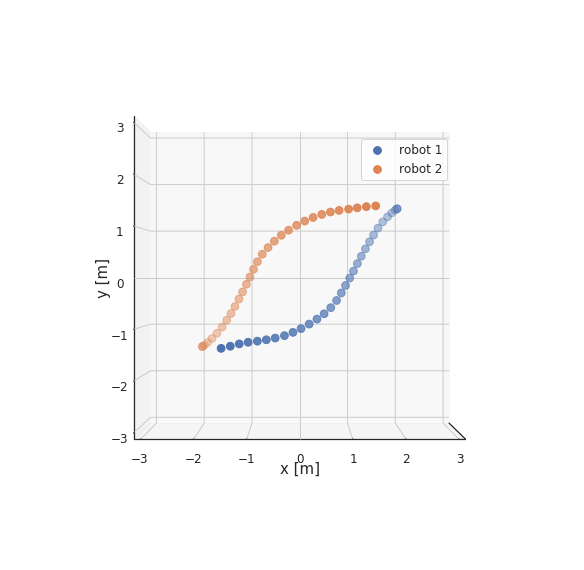

In [5]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']

x2 = new_data[1]['time']
y2 = new_data[1]['x']
z2 = new_data[1]['y']



#ax.set_xlabel("time")
ax.set_ylabel("x [m]", fontsize = 15)
ax.set_zlabel("y [m]", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=60)
ax.scatter(x2, y2, z2, label="robot 2", s=60)

ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.780), fontsize=12)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [6]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
euclidean_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
for j in range(num):
    #print(x_arr[j])
    euclidean_dist[j] += sqrt((x[j][0]-x[j][-1])**2+(y[j][0]-y[j][-1])**2)
print(traj_dist)
print(euclidean_dist)
print(np.average(np.array(euclidean_dist)/np.array(traj_dist)))



[4.817751186524587, 4.806333651394295]
[4.5239967518775925, 4.498755522821438]
0.9375161566584831
